## Import libraries

In [79]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

## Import dataset

In [80]:
raw_data = pd.read_csv('loan_data.csv', index_col = 0)

/var/folders/vx/326cm1rx7t946zgrnfn7rkxh0000gn/T/ipykernel_37616/2661996383.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('loan_data.csv', index_col = 0)


## Exploring dataset

In [81]:
raw_data.shape

(466285, 74)

In [82]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [83]:
raw_data.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
339188,22432014,24764919,35000,35000,35000.0,36 months,11.67,1157.0,B,B4,Engineering Manager,7 years,MORTGAGE,140000.0,Verified,Jul-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,757xx,TX,11.22,1.0,May-95,1.0,21.0,NaN,11.0,0.0,35615,43.6,27.0,w,19982.95,19982.95,19669.0,19669.0,15017.05,4651.95,0.0,0.0,0.0,Jan-16,1157.0,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,96831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66000.0,NaN,NaN,NaN


In [84]:
raw_data.id.nunique()

466285

In [85]:
raw_data.member_id.nunique()

466285

In [86]:
drop = [
    'id',
    'member_id',
    'url',
    'desc',
    'zip_code',
    'annual_inc_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'sub_grade'
]

In [87]:
data = raw_data.drop(drop, axis = 1)

In [88]:
data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
332781,9600,9600,9600.0,36 months,19.52,354.43,E,HR Supervisor,10+ years,RENT,50000.0,Source Verified,Aug-14,Current,n,debt_consolidation,Debt consolidation,NY,10.97,0.0,Mar-93,0.0,52.0,50.0,7.0,1.0,2045,35.9,17.0,w,5752.99,5752.99,6025.31,6025.31,3847.01,2178.30,0.0,0.0,0.0,Jan-16,354.43,Feb-16,Jan-16,0.0,52.0,1,INDIVIDUAL,NaN,0.0,0.0,10139.0,5700.0
292362,9000,9000,9000.0,36 months,12.49,301.04,B,Department Manager,5 years,RENT,53000.0,Source Verified,Oct-14,Current,n,credit_card,Credit card refinancing,CA,16.03,0.0,Nov-08,0.0,NaN,NaN,7.0,0.0,9000,112.5,10.0,f,5652.35,5652.35,4515.60,4515.60,3347.65,1167.95,0.0,0.0,0.0,Jan-16,301.04,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,0.0,0.0,27527.0,8000.0
88812,8400,8400,8400.0,36 months,13.67,285.75,B,ADP,6 years,MORTGAGE,60000.0,Not Verified,Sep-13,Current,n,debt_consolidation,Bills,KY,5.66,0.0,Sep-00,1.0,28.0,NaN,12.0,0.0,3592,30.9,27.0,f,2431.26,2431.26,7715.00,7715.00,5968.74,1746.26,0.0,0.0,0.0,Jan-16,285.75,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,0.0,178.0,95631.0,11623.0
244756,8000,8000,8000.0,36 months,13.66,272.11,C,Chieef Engineer,8 years,RENT,53000.0,Not Verified,Nov-14,Charged Off,n,debt_consolidation,Debt consolidation,NJ,13.30,0.0,Jun-06,1.0,71.0,NaN,16.0,0.0,15502,33.0,37.0,w,0.00,0.00,2170.81,2170.81,1507.38,663.43,0.0,0.0,0.0,Jul-15,272.11,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,NaN,0.0,0.0,15502.0,47000.0
275812,3600,3600,3600.0,36 months,11.67,119.01,B,sales,6 years,RENT,60000.0,Not Verified,Oct-14,Current,n,debt_consolidation,Debt consolidation,RI,29.30,0.0,Sep-06,0.0,45.0,NaN,17.0,0.0,12814,49.9,25.0,f,2250.50,2250.50,1780.48,1780.48,1349.50,430.98,0.0,0.0,0.0,Jan-16,119.01,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,0.0,0.0,31540.0,25700.0


## Define target variabel/labeling

Dalam project credit risk modeling, tujuan utama adalah untuk melakukan prediksi terhadap suatu individu akan kemampuan mereka untuk melakukan pembayaran terhadap pinjaman/kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan individu dalam hal tersebut.

Dalam dataset ini, variabel `loan_status` adalah variabel yang dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [89]:
data.loan_status.value_counts(normalize = True)*100

loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: proportion, dtype: float64

Data dilihat bahwa variabel `loan_status` memiliki beberapa nilai:

`Currect` artinya pembayaran lancar, `Charged Off` artinya pembayaran macet sehingga dihapus bukukan, `Late` artinya pembayaran telat dilakukan, `In Grace Period` artinya dalam masa tenggang, `Fully Paid` artinya pembayaran lunas, `Default` artinya pembayaran macet.

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan `bad loan` atau `good loan`.

Definisi bad dan good loan terkadang bisa berbeda tergantung dari kebutuhan bisnis. Pada contoh ini, saya menggunakan keterlambatan pembayaran diatas 30 hari dan yang lebih buruk dari itu sebagai penanda bad loan.

In [90]:
bad_status = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged Off',
    'Late (31-120 days)'
]

data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [91]:
data['bad_flag'].value_counts(normalize = True)*100

bad_flag
0    89.069346
1    10.930654
Name: proportion, dtype: float64

Setelah melakukan falgging terhadap bad/good loan, dapat dilihat bahwa jumlah individu yang ditandai sebagai bad loan jauh lebih sedikit daripada good loan. Hal ini menyebabkan problem ini menjadi problem imbalanced dataset.

Jangan lupa untuk membuang kolom asal `loan_status`.

In [92]:
data.drop('loan_status', axis = 1, inplace = True)

## Cleaning, Preprocessing, Feature engineering

Pada step ini, dilakukan pembersihan/modifikasi beberapa fitur ke dalam format yang dapat digunakan untuk modeling.

#### emp_length
Memodifikasi `emp_length`. ex: 4 years -> 4.

In [93]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [94]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('<1 years', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

In [95]:
data['emp_length_int'] = data['emp_length_int'].replace('10+', 10)
data['emp_length_int'] = data['emp_length_int'].replace('< 1', 1)

In [96]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [97]:
data.drop('emp_length', axis = 1, inplace = True)

#### term
Memodifikasi `term`. ex: 36 Months -> 36

In [98]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [99]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [100]:
data.drop('term', axis = 1, inplace = True)

#### earliest_cr_line
Memodifikasi `earliest_cr_line` dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. Untuk melakukan hal ini, umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset tahun 2007-2014, maka akan lebih relevan jika menggunakan reference date sekitar di tahun 2017. Dalam contoh ini, saya menggunakan tanggal 2017-12-01 sebagai reference date.

In [101]:
data['earliest_cr_line'].head(5)

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [102]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format = '%b-%y')
data['earliest_cr_line_date'].head(5)

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [103]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') 
                                                           - data['earliest_cr_line_date']) 
                                                          / np.timedelta64(1, 'm') 
                                                          / (30.44 * 24 * 60)))
data['mths_since_earliest_cr_line'].head(5)

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [104]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Terlihat ada nilai yang aneh yaitu negatif.

In [105]:
data[data['mths_since_earliest_cr_line'] <0 ][['earliest_cr_line', 
                                               'earliest_cr_line_date', 
                                               'mths_since_earliest_cr_line']].head(5)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0


Ternyata nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962.

Untuk mengatasi hal ini, dapat dilakukan preprocessing lebih jauh jika ingin membenarkan tahun 2062 menjadi 1962. Namun, kali ini saya hanya mengubah nilai yang negatif menjadi nilai maksimum dari fitur tersebut. Karena disini saya mengetahui bahwa nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika saya mengganti nilai-nilai tersebut menjadi nilai terbesar.

In [106]:
data.loc[data['mths_since_earliest_cr_line']<0, 
         'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [107]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis = 1, inplace = True)

#### issue_d
Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [108]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format = '%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') 
                                                           - data['issue_d_date']) 
                                                          / np.timedelta64(1, 'm') 
                                                          / (30.44 * 24 * 60)))
data['issue_d_date'].head(5)

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d_date, dtype: datetime64[ns]

In [109]:
data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [110]:
data.drop(['issue_d', 'issue_d_date'], axis = 1, inplace = True)

#### last_pymnt_d
Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [111]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format = '%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') 
                                                           - data['last_pymnt_d_date']) 
                                                          / np.timedelta64(1, 'm') 
                                                          / (30.44 * 24 * 60)))
data['last_pymnt_d_date'].head(5)

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-01-01
Name: last_pymnt_d_date, dtype: datetime64[ns]

In [112]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [113]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis = 1, inplace = True)

#### next_pymnt_d
Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [114]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format = '%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') 
                                                           - data['next_pymnt_d_date']) 
                                                          / np.timedelta64(1, 'm') 
                                                          / (30.44 * 24 * 60)))
data['next_pymnt_d_date'].head(5)

0          NaT
1          NaT
2          NaT
3          NaT
4   2016-02-01
Name: next_pymnt_d_date, dtype: datetime64[ns]

In [115]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [116]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis = 1, inplace = True)

#### last_credit_pull_d
Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [117]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format = '%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') 
                                                           - data['last_credit_pull_d_date']) 
                                                          / np.timedelta64(1, 'm') 
                                                          / (30.44 * 24 * 60)))
data['last_credit_pull_d_date'].head(5)

0   2016-01-01
1   2013-09-01
2   2016-01-01
3   2015-01-01
4   2016-01-01
Name: last_credit_pull_d_date, dtype: datetime64[ns]

In [118]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [119]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis = 1, inplace = True)

## Exploratory data analysis

#### Correlation check

/Users/egifermana/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

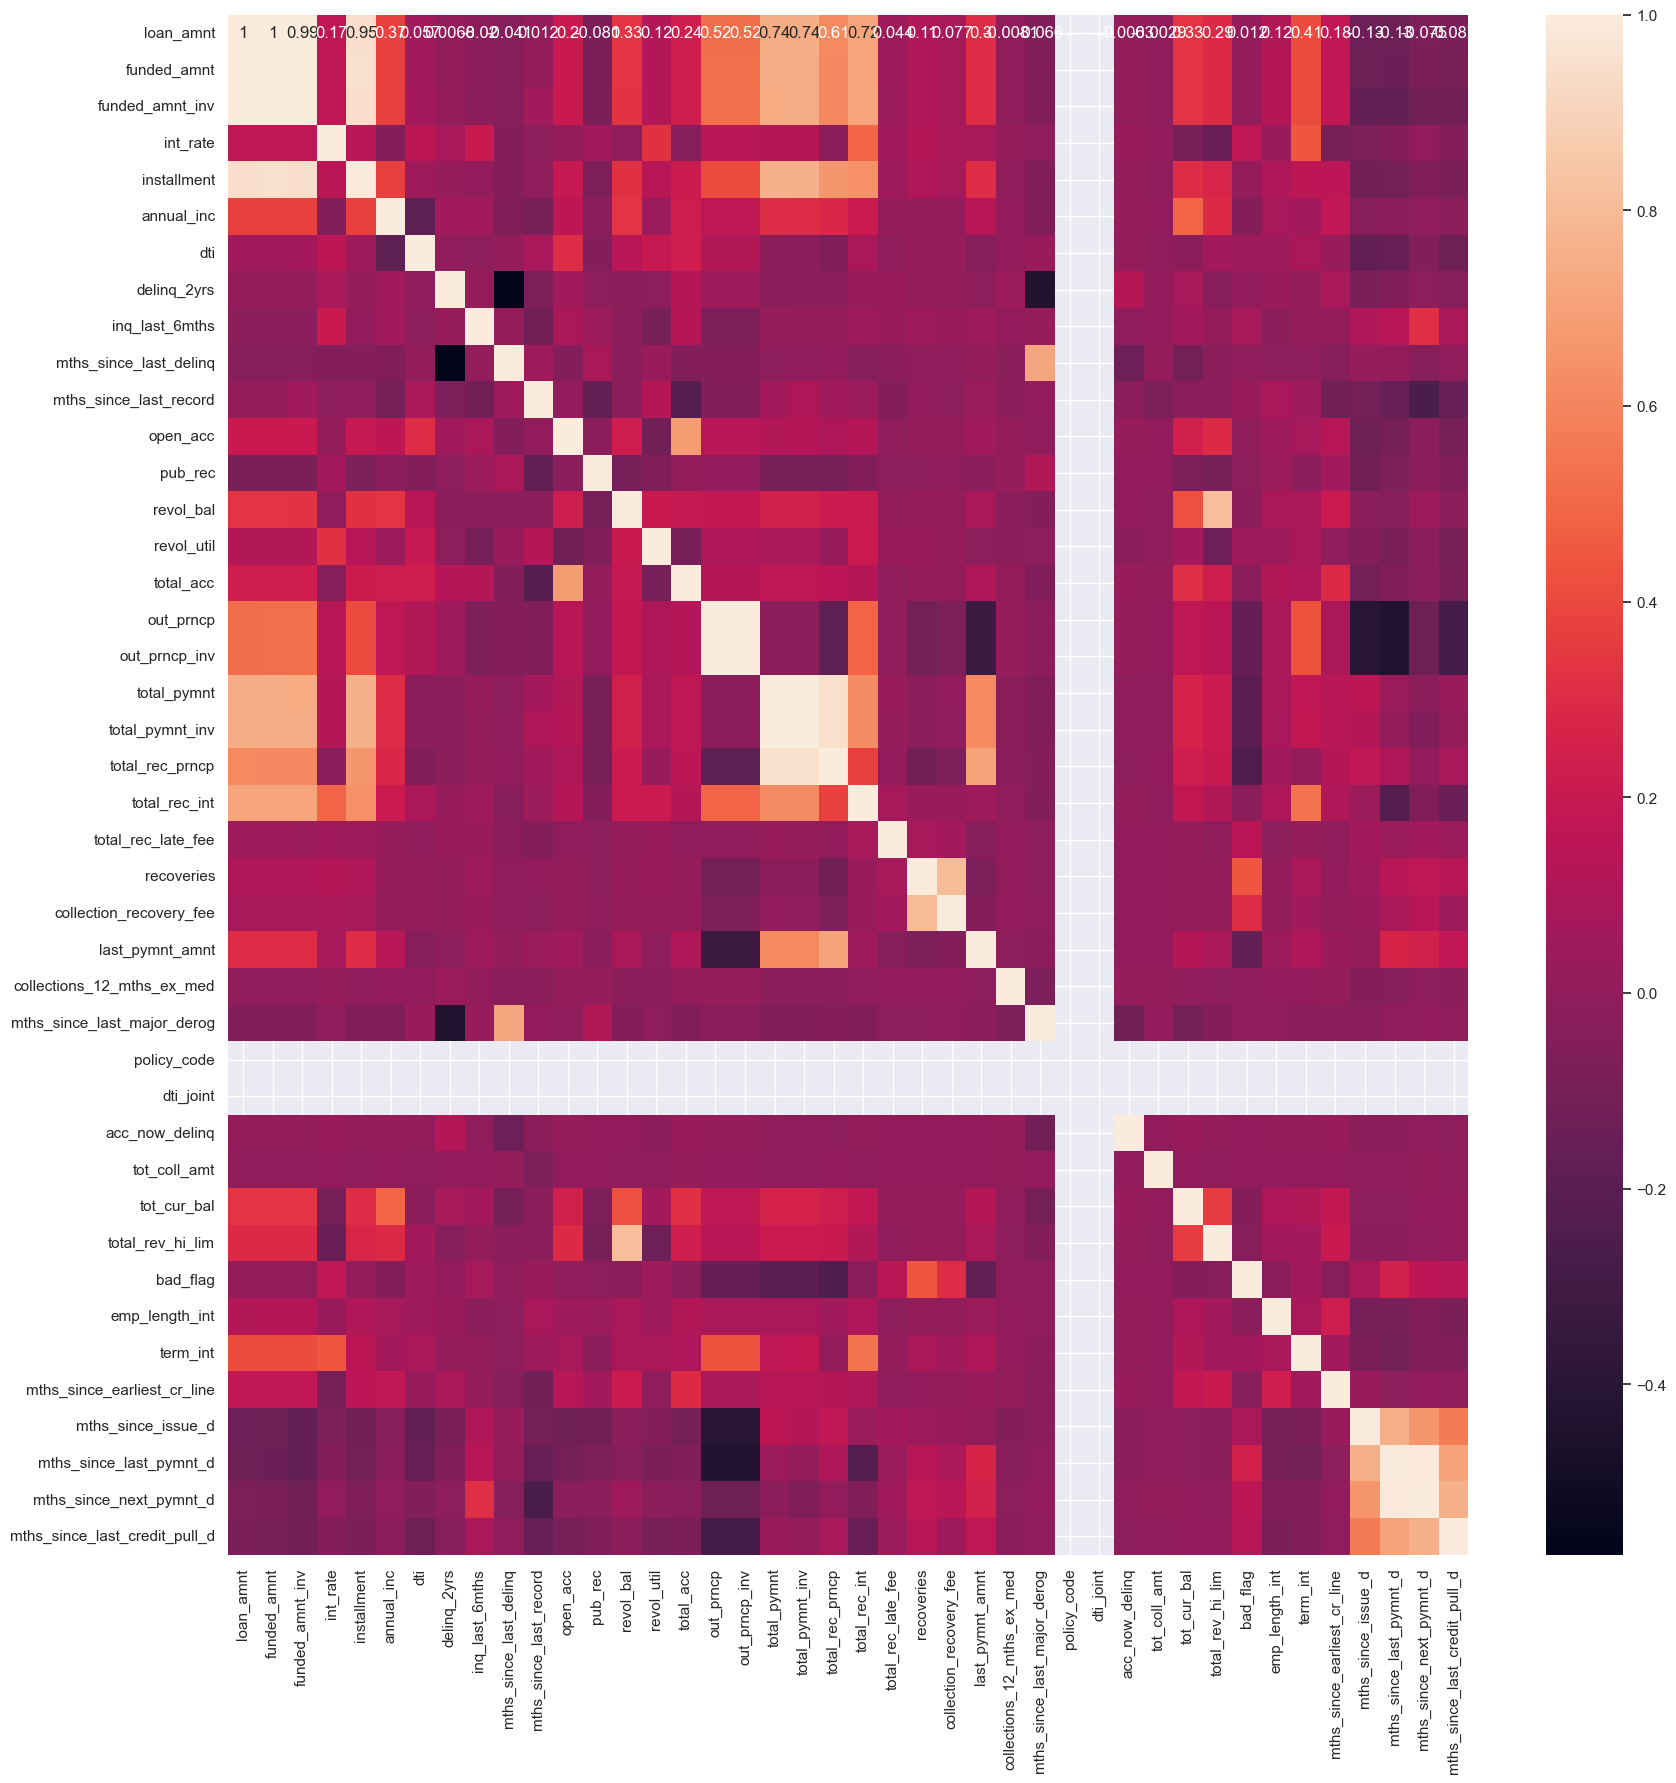

In [125]:
numeric_data = data.select_dtypes(include = ['float64', 'int64'])

plt.figure(figsize = (20, 20))
sns.heatmap(numeric_data.corr(), annot = True)

In [128]:
corr_matrix = numeric_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [129]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [130]:
data.select_dtypes(include = 'object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63098
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [131]:
data.drop(['emp_title', 'title', 'application_type'], axis = 1, inplace = True)

In [132]:
data.select_dtypes(exclude = 'object').nunique()

loan_amnt                          1352
funded_amnt                        1354
funded_amnt_inv                    9854
int_rate                            506
installment                       55622
annual_inc                        31901
dti                                3997
delinq_2yrs                          24
inq_last_6mths                       28
mths_since_last_delinq              145
mths_since_last_record              123
open_acc                             62
pub_rec                              26
revol_bal                         58142
revol_util                         1269
total_acc                           112
out_prncp                        135665
out_prncp_inv                    141189
total_pymnt                      351609
total_pymnt_inv                  347659
total_rec_prncp                  172713
total_rec_int                    270249
total_rec_late_fee                 5808
recoveries                        22773
collection_recovery_fee           20275


Ternyata, pada tipe data selain `object` juga terdapat fitur yang hanya memiliki satu nilai unik saja, maka akan ikut dibuang juga.


In [133]:
data.drop(['policy_code'], axis = 1, inplace = True)

In [134]:
for col in data.select_dtypes(include = 'object').columns.tolist():
    print(data[col].value_counts(normalize = True)*100)
    print('\n')

grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: proportion, dtype: float64


home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: proportion, dtype: float64


verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: proportion, dtype: float64


pymnt_plan
n    99.99807
y     0.00193
Name: proportion, dtype: float64


purpose
debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276


Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [ ]:
data.drop('pymnt_plan', axis = 1, inplace = True)

## Missing values
#### Missing value checking

In [139]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending = False)

dti_joint                        100.000000
mths_since_last_record            86.566585
mths_since_last_major_derog       78.773926
mths_since_last_delinq            53.690554
mths_since_next_pymnt_d           48.728567
tot_coll_amt                      15.071469
total_rev_hi_lim                  15.071469
tot_cur_bal                       15.071469
emp_length_int                     4.505399
mths_since_last_pymnt_d            0.080637
revol_util                         0.072917
collections_12_mths_ex_med         0.031097
mths_since_last_credit_pull_d      0.009007
acc_now_delinq                     0.006219
delinq_2yrs                        0.006219
total_acc                          0.006219
pub_rec                            0.006219
mths_since_earliest_cr_line        0.006219
open_acc                           0.006219
inq_last_6mths                     0.006219
annual_inc                         0.000858
dtype: float64

In [145]:
to_drop = ['mths_since_next_pymnt_d',
          'total_rev_hi_lim',
          'mths_since_last_pymnt_d',
          'mths_since_last_credit_pull_d',
]

data.drop(to_drop, axis = 1, inplace = True)

In [146]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending = False)

mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

#### Missing values filling

In [147]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

## Feature scaling and transformation

#### One hot encoding
Semua kolom kategorikal dilakukan one hot encoding.

In [148]:
categorical_cols = [col for col in data.select_dtypes(include = 'object').columns.tolist()]

In [150]:
onehot = pd.get_dummies(data[categorical_cols], drop_first = True)
onehot.head(5)

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,True,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Standardization
Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [151]:
numerical_cols = [col for col in data.columns.tolist()
                  if col not in categorical_cols + ['bad_flag']]

In [154]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns = numerical_cols)
std.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-1.122963,-1.114455,-0.729587,-1.105575,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.693896,-0.687137,-0.683064,-0.549800,-0.695548,-0.123464,-0.154549,-0.104824,-0.531492,-0.083608,-0.058307,-0.012089,-0.792648,1.151811,-0.616225,1.764941,1.446626
1,-1.426088,-1.425101,-1.412732,0.330634,-1.528763,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.693896,-1.274191,-1.267385,-1.195952,-0.867019,-0.123464,0.057470,-0.091840,-0.540846,-0.083608,-0.058307,-0.012089,-0.792648,-1.316991,1.622784,-0.212426,1.446626
2,-1.438156,-1.437186,-1.424784,0.488979,-1.428140,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.693896,-1.032837,-1.025695,-0.919555,-0.799187,-0.123464,-0.154549,-0.104824,-0.445387,-0.083608,-0.058307,-0.012089,-0.792648,1.151811,-0.616225,-0.570896,1.446626
3,-0.521001,-0.518687,-0.508860,-0.077850,-0.380931,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,-0.693896,0.082948,0.091640,0.161268,-0.152728,3.099264,-0.154549,-0.104824,-0.498032,-0.083608,-0.058307,-0.012089,-0.792648,1.151811,-0.616225,0.226989,1.446626
4,-1.365749,-1.364673,-1.352474,-0.261438,-1.496071,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.573185,-1.003980,-0.996798,-0.943290,-0.635962,-0.123464,-0.154549,-0.104824,-0.550184,-0.083608,-0.058307,-0.012089,-0.792648,-1.316991,1.622784,0.238553,1.446626


#### Transformed dataframe
Menggabungkan kembali kolom-kolom hasil transformasi

In [155]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis =1)

## Modeling
#### Train-test split

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x = data_model.drop('bad_flag', axis = 1)
y = data_model['bad_flag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [158]:
x_train.shape, x_test.shape

((373028, 109), (93257, 109))

### Training
Pada contoh ini digunakan algoritma Random Forest untuk permodelan.

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
rfc = RandomForestClassifier(max_depth = 4)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [161]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = x_train.columns.values
    
df_feature_importance = pd.DataFrame(index = range(len(arr_feature_importances)), columns = ['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by = 'importance', ascending = False)
df_all_features

,feature,importance
98,recoveries,0.259631
99,collection_recovery_fee,0.257703
95,total_rec_prncp,0.100402
100,last_pymnt_amnt,0.065701
92,out_prncp_inv,0.063145
...,...,...
24,purpose_vacation,0.000000
68,addr_state_UT,0.000000
70,addr_state_VT,0.000000
72,addr_state_WI,0.000000


#### Validation
Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

In [163]:
y_pred_proba = rfc.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test),
                        columns = ['y_actual']), pd.DataFrame(y_pred_proba,
                        columns = ['y_pred_proba'])], axis = 1)
df_actual_predicted.index = y_test.index

### AUC

In [164]:
from sklearn.metrics import roc_curve, roc_auc_score

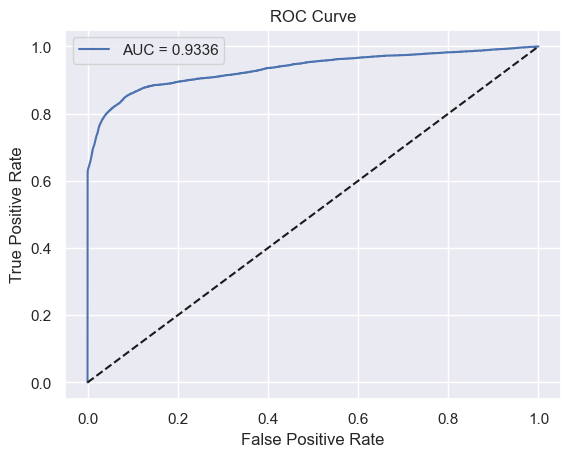

In [165]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label = 'AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### KS

In [ ]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [173]:
df_actual_predicted.head(10)

,level_0,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,0,440656,0,0.033684,1,0,1,0.000011,0.0,0.000012
1,1,413752,0,0.033962,2,0,2,0.000021,0.0,0.000024
2,2,69951,0,0.034241,3,0,3,0.000032,0.0,0.000036
3,3,342832,0,0.034259,4,0,4,0.000043,0.0,0.000048
4,4,291345,0,0.034740,5,0,5,0.000054,0.0,0.000060
5,5,338719,0,0.035225,6,0,6,0.000064,0.0,0.000072
6,6,272438,0,0.035315,7,0,7,0.000075,0.0,0.000084
7,7,257453,0,0.035724,8,0,8,0.000086,0.0,0.000096
8,8,389488,0,0.035756,9,0,9,0.000097,0.0,0.000108
9,9,294584,0,0.035993,10,0,10,0.000107,0.0,0.000120


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.7660')

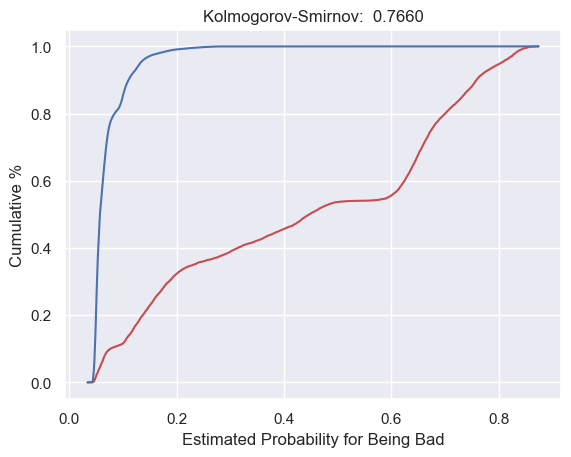

In [168]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.9336` dan `KS = 0.7660`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

## Saran

Beberapa hal lain yang dapat dilakukan untuk project ini:

* Jika menginginkan interpretabilitas yang lebih tinggi, dapat mempertimbangkan untuk membuat Credit Scorecard dengan menggunakan algoritma Logistic Regression dengan pendekatan-pendekatannya seperti Feature Selection menggunakan Information Value dan Feature Engineering menggunakan Weight of Evidence.

* Jika interpretabilitas tidak terlalu dibutuhkan, dapat mempertimbangkan untuk mencoba algoritma-algoritma Machine Learning lainnya seperti Boosting.

* Melakukan hyperparameter tuning.

* Melakukan pemeriksaan atau memastikan bahwa model yang telah dibuat tidak overfitting. Hal ini dapat dilakukan dengan mencoba membandingkan hasil performa model ketika diprediksi terhadap data training dan ketika diprediksi terhadap data testing.

* Umumnya, langkah yang lebih tepat adalah melakukan Train-Test Split terlebih dahulu sebelum melakukan transformasi fitur seperti encoding atau scaling. Namun, karena alasan simplisitas contoh ini melakukan sebaliknya karena umumnya perbedaan performa juga tidak terlalu berbeda.